In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data

In [2]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [4]:
import pandas_datareader.data as web
import datetime

start = datetime.datetime(2019, 1, 1)
end = datetime.datetime(2023, 1, 31)

df = web.DataReader('TSLA', 'tiingo', start, end,api_key='f16e807c3ff8cdadadc1b5828bfac4d9acce61e7')

print(df.head())


                                   close    high     low    open    volume  \
symbol date                                                                  
TSLA   2019-01-02 00:00:00+00:00  310.12  315.13  298.80  306.10  11658648   
       2019-01-03 00:00:00+00:00  300.36  309.40  297.38  307.00   6965184   
       2019-01-04 00:00:00+00:00  317.69  318.00  302.73  306.00   7394116   
       2019-01-07 00:00:00+00:00  334.96  336.74  317.75  321.72   7551225   
       2019-01-08 00:00:00+00:00  335.35  344.01  327.02  341.96   7008516   

                                   adjClose    adjHigh     adjLow    adjOpen  \
symbol date                                                                    
TSLA   2019-01-02 00:00:00+00:00  20.674667  21.008667  19.920000  20.406667   
       2019-01-03 00:00:00+00:00  20.024000  20.626667  19.825333  20.466667   
       2019-01-04 00:00:00+00:00  21.179333  21.200000  20.182000  20.400000   
       2019-01-07 00:00:00+00:00  22.330667  22.44933

C:\Users\mdsah\AppData\Roaming\Python\Python39\site-packages\pandas_datareader\tiingo.py:234: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  return pd.concat(dfs, self._concat_axis)


In [5]:
df.tail()

close    high     low     open     volume  \
symbol date                                                                    
TSLA   2023-01-25 00:00:00+00:00  144.43  146.41  138.07  141.905  192734347   
       2023-01-26 00:00:00+00:00  160.27  161.42  154.76  159.965  234815090   
       2023-01-27 00:00:00+00:00  177.90  180.68  161.17  162.430  306590613   
       2023-01-30 00:00:00+00:00  166.66  179.77  166.50  178.050  230878807   
       2023-01-31 00:00:00+00:00  173.22  174.30  162.78  164.570  196813541   

                                  adjClose  adjHigh  adjLow  adjOpen  \
symbol date                                                            
TSLA   2023-01-25 00:00:00+00:00    144.43   146.41  138.07  141.905   
       2023-01-26 00:00:00+00:00    160.27   161.42  154.76  159.965   
       2023-01-27 00:00:00+00:00    177.90   180.68  161.17  162.430   
       2023-01-30 00:00:00+00:00    166.66   179.77  166.50  178.050   
       2023-01-31 00:00:00+00:00    173.22   174.30  162.78  164.570   

                                  adjVolume  divCash  splitFactor  
symbol date                                                        
TSLA   2023-01-25 00:00:00+00:00  192734347      0.0          1.0  
       2023-01-26 00:00:00+00:00  234815090      0.0          1.0  
       2023-01-27 00:00:00+00:00  306590613      0.0          1.0  
       2023-01-30 00:00:00+00:00  230878807      0.0          1.0  
       2023-01-31 00:00:00+00:00  196813541      0.0          1.0

In [6]:
df=df.reset_index()

In [7]:
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,TSLA,2019-01-02 00:00:00+00:00,310.12,315.13,298.80,306.10,11658648,20.674667,21.008667,19.920000,20.406667,174879720,0.0,1.0
1,TSLA,2019-01-03 00:00:00+00:00,300.36,309.40,297.38,307.00,6965184,20.024000,20.626667,19.825333,20.466667,104477760,0.0,1.0
2,TSLA,2019-01-04 00:00:00+00:00,317.69,318.00,302.73,306.00,7394116,21.179333,21.200000,20.182000,20.400000,110911740,0.0,1.0
3,TSLA,2019-01-07 00:00:00+00:00,334.96,336.74,317.75,321.72,7551225,22.330667,22.449333,21.183333,21.448000,113268375,0.0,1.0
4,TSLA,2019-01-08 00:00:00+00:00,335.35,344.01,327.02,341.96,7008516,22.356667,22.934000,21.801333,22.797333,105127740,0.0,1.0


In [8]:
df=df.drop(['date','adjClose','adjHigh','adjLow','adjOpen','adjVolume','divCash','splitFactor'],axis=1)

In [9]:
df.head()

,symbol,close,high,low,open,volume
0,TSLA,310.12,315.13,298.80,306.10,11658648
1,TSLA,300.36,309.40,297.38,307.00,6965184
2,TSLA,317.69,318.00,302.73,306.00,7394116
3,TSLA,334.96,336.74,317.75,321.72,7551225
4,TSLA,335.35,344.01,327.02,341.96,7008516


In [10]:
df=df.drop(['symbol'],axis=1)

In [11]:
df.head()

,close,high,low,open,volume
0,310.12,315.13,298.80,306.10,11658648
1,300.36,309.40,297.38,307.00,6965184
2,317.69,318.00,302.73,306.00,7394116
3,334.96,336.74,317.75,321.72,7551225
4,335.35,344.01,327.02,341.96,7008516


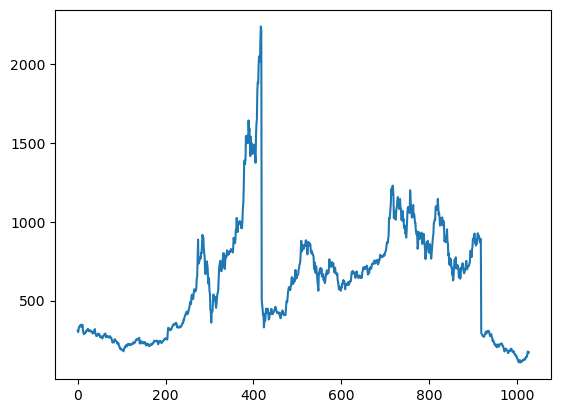

In [12]:
plt.plot(df.close)

In [13]:
df

,close,high,low,open,volume
0,310.12,315.13,298.80,306.100,11658648
1,300.36,309.40,297.38,307.000,6965184
2,317.69,318.00,302.73,306.000,7394116
3,334.96,336.74,317.75,321.720,7551225
4,335.35,344.01,327.02,341.960,7008516
...,...,...,...,...,...
1023,144.43,146.41,138.07,141.905,192734347
1024,160.27,161.42,154.76,159.965,234815090
1025,177.90,180.68,161.17,162.430,306590613
1026,166.66,179.77,166.50,178.050,230878807


In [14]:
ma100=df.close.rolling(100).mean()

In [15]:
ma100

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
1023    199.97875
1024    198.80985
1025    197.88675
1026    196.80915
1027    195.70435
Name: close, Length: 1028, dtype: float64

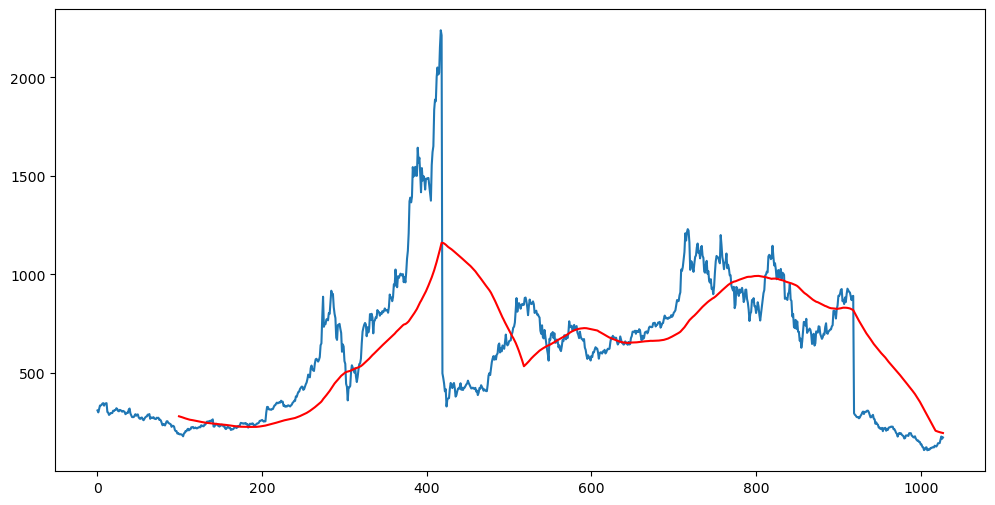

In [16]:
plt.figure(figsize=(12,6))
plt.plot(df.close)
plt.plot(ma100,'r')

In [17]:
ma200=df.close.rolling(200).mean()
ma200

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
1023    489.645625
1024    485.319525
1025    481.329375
1026    477.227925
1027    472.982175
Name: close, Length: 1028, dtype: float64

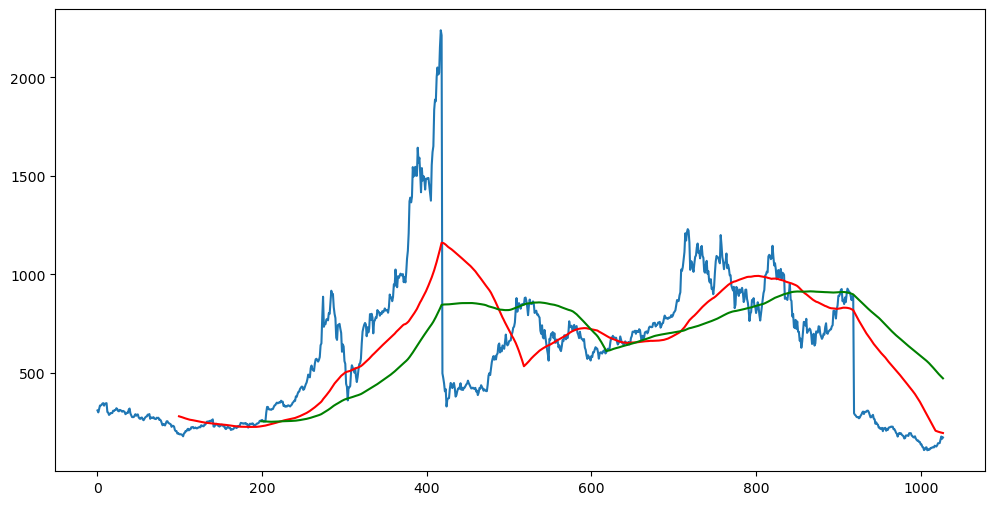

In [18]:
plt.figure(figsize=(12,6))
plt.plot(df.close)
plt.plot(ma100,'r')
plt.plot(ma200,'g')

In [19]:
df.shape

(1028, 5)

In [20]:
#spilitting data into Traninig and Testing
data_training=pd.DataFrame(df['close'][0:int(len(df)*0.70)])
data_testing=pd.DataFrame(df['close'][int(len(df)*0.70):int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(719, 1)
(309, 1)


In [21]:
data_training.head()

,close
0,310.12
1,300.36
2,317.69
3,334.96
4,335.35


In [22]:
data_testing.head()

,close
719,1162.94
720,1023.50
721,1067.95
722,1063.51
723,1033.42


In [23]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))

In [24]:
data_training_array=scaler.fit_transform(data_training)
data_training_array

array([[0.06367185],
       [0.05893348],
       [0.067347  ],
       [0.07573139],
       [0.07592073],
       [0.07746458],
       [0.08059113],
       [0.0817029 ],
       [0.07545952],
       [0.08032897],
       [0.08111546],
       [0.08172717],
       [0.05985591],
       [0.05823437],
       [0.05273379],
       [0.0546369 ],
       [0.05732166],
       [0.05700123],
       [0.05752556],
       [0.06301644],
       [0.06216683],
       [0.06468652],
       [0.06501665],
       [0.06912389],
       [0.06711882],
       [0.06240472],
       [0.06157454],
       [0.06499238],
       [0.06449232],
       [0.06272515],
       [0.06058899],
       [0.06258435],
       [0.06149686],
       [0.06000155],
       [0.05450097],
       [0.05619047],
       [0.05816155],
       [0.05771976],
       [0.06591481],
       [0.06841022],
       [0.05622931],
       [0.05165115],
       [0.04736914],
       [0.04722349],
       [0.04739341],
       [0.05105885],
       [0.05435046],
       [0.050

In [25]:
x_train=[]
y_train=[]

for i in range(100,data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i, 0])
    
x_train,y_train=np.array(x_train),np.array(y_train)

In [26]:
# ML model

In [27]:
x_train.shape

(619, 100, 1)

In [28]:
model=Sequential()
model.add(LSTM(units=50,activation='relu',return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=60,activation='relu',return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80,activation='relu',return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))

In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [30]:
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(x_train,y_train,epochs=50)

Epoch 1/50
20/20 [==============================] - 8s 220ms/step - loss: 0.0379
Epoch 2/50
20/20 [==============================] - 5s 227ms/step - loss: 0.0193
Epoch 3/50
20/20 [==============================] - 5s 245ms/step - loss: 0.0155
Epoch 4/50
20/20 [==============================] - 5s 238ms/step - loss: 0.0136
Epoch 5/50
20/20 [==============================] - 5s 223ms/step - loss: 0.0113
Epoch 6/50
20/20 [==============================] - 5s 251ms/step - loss: 0.0104
Epoch 7/50
20/20 [==============================] - 5s 229ms/step - loss: 0.0105
Epoch 8/50
20/20 [==============================] - 4s 222ms/step - loss: 0.0100
Epoch 9/50
20/20 [==============================] - 4s 223ms/step - loss: 0.0080
Epoch 10/50
20/20 [==============================] - 5s 233ms/step - loss: 0.0090
Epoch 11/50
20/20 [==============================] - 5s 228ms/step - loss: 0.0086
Epoch 12/50
20/20 [==============================] - 5s 248ms/step - loss: 0.0096
Epoch 13/50
20/20 [======

In [31]:
model.save('keras.model.h5')

In [32]:
data_testing.head()

,close
719,1162.94
720,1023.50
721,1067.95
722,1063.51
723,1033.42


In [33]:
past_100_days=data_training.tail(100)

In [34]:
final_df=past_100_days.append(data_testing, ignore_index=True)

C:\Users\mdsah\AppData\Local\Temp\ipykernel_9632\351597942.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df=past_100_days.append(data_testing, ignore_index=True)


In [35]:
final_df.head()

,close
0,616.60
1,623.31
2,620.83
3,623.71
4,656.57


In [36]:
input_data=scaler.fit_transform(final_df)
input_data

array([[4.53285316e-01],
       [4.59266721e-01],
       [4.57056008e-01],
       [4.59623287e-01],
       [4.88915235e-01],
       [5.09640670e-01],
       [5.02553908e-01],
       [5.17574277e-01],
       [5.10478602e-01],
       [5.09533700e-01],
       [5.07946979e-01],
       [5.08820567e-01],
       [4.91598399e-01],
       [4.78289550e-01],
       [4.85563509e-01],
       [4.89253973e-01],
       [5.14882199e-01],
       [4.99585491e-01],
       [4.86071616e-01],
       [4.83593478e-01],
       [4.77906241e-01],
       [4.79689074e-01],
       [4.92418502e-01],
       [4.87774222e-01],
       [4.82398980e-01],
       [4.77157451e-01],
       [4.89851223e-01],
       [4.78405434e-01],
       [4.80366550e-01],
       [5.07438871e-01],
       [5.16219324e-01],
       [5.36249454e-01],
       [5.36311853e-01],
       [5.37363725e-01],
       [5.40670880e-01],
       [5.26827181e-01],
       [5.39895348e-01],
       [5.36534707e-01],
       [5.34600333e-01],
       [5.47463474e-01],


In [37]:
input_data.shape

(409, 1)

In [38]:
x_test=[]
y_test=[]

for i in range(100,input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])

In [39]:
x_test,y_test=np.array(x_test),np.array(y_test)

In [40]:
print(x_test.shape)
print(y_test.shape)

(309, 100, 1)
(309,)


In [41]:
#Making prediction

In [42]:
y_predicted=model.predict(x_test)
y_predicted

10/10 [==============================] - 2s 91ms/step


array([[0.7338614 ],
       [0.6609712 ],
       [0.55965227],
       [0.46424347],
       [0.40137494],
       [0.37925214],
       [0.39879313],
       [0.4549062 ],
       [0.53891796],
       [0.63707596],
       [0.73755604],
       [0.83080477],
       [0.9035415 ],
       [0.946229  ],
       [0.9514697 ],
       [0.922236  ],
       [0.8670649 ],
       [0.7950793 ],
       [0.71940243],
       [0.64671713],
       [0.5874208 ],
       [0.55514866],
       [0.55768776],
       [0.58371866],
       [0.62490976],
       [0.67027164],
       [0.7119007 ],
       [0.7468731 ],
       [0.77138275],
       [0.7859079 ],
       [0.79029375],
       [0.7892794 ],
       [0.79087824],
       [0.80099976],
       [0.82139355],
       [0.8476326 ],
       [0.8716009 ],
       [0.8825649 ],
       [0.8702735 ],
       [0.84501725],
       [0.80822974],
       [0.7571611 ],
       [0.6948562 ],
       [0.62763125],
       [0.57159287],
       [0.5398679 ],
       [0.5432524 ],
       [0.571

In [43]:
y_predicted.shape

(309, 1)

In [44]:
y_test

array([9.40301834e-01, 8.16002710e-01, 8.55626176e-01, 8.51668286e-01,
       8.24845562e-01, 8.06990489e-01, 8.43841649e-01, 8.74399408e-01,
       8.80969148e-01, 9.17231973e-01, 9.34890935e-01, 8.92245567e-01,
       8.98458741e-01, 8.68079265e-01, 9.17169574e-01, 9.24095881e-01,
       8.79738993e-01, 8.70468261e-01, 8.08398927e-01, 8.03086084e-01,
       8.41185227e-01, 8.56526506e-01, 7.98441804e-01, 8.10235245e-01,
       7.65111739e-01, 7.58069548e-01, 7.73651510e-01, 7.29909700e-01,
       7.34946203e-01, 7.05859281e-01, 7.40259046e-01, 8.02961286e-01,
       8.54779330e-01, 8.78794092e-01, 8.73918043e-01, 8.71885613e-01,
       8.57756661e-01, 8.45669053e-01, 9.73141619e-01, 9.28401423e-01,
       8.73606047e-01, 8.52729072e-01, 8.19087011e-01, 8.46863551e-01,
       8.52461647e-01, 8.89740687e-01, 8.23187527e-01, 8.39277596e-01,
       8.22251540e-01, 7.91176759e-01, 7.91729437e-01, 7.45045953e-01,
       7.32655262e-01, 7.22314830e-01, 7.39260659e-01, 6.42711333e-01,
      

In [45]:
y_predicted

array([[0.7338614 ],
       [0.6609712 ],
       [0.55965227],
       [0.46424347],
       [0.40137494],
       [0.37925214],
       [0.39879313],
       [0.4549062 ],
       [0.53891796],
       [0.63707596],
       [0.73755604],
       [0.83080477],
       [0.9035415 ],
       [0.946229  ],
       [0.9514697 ],
       [0.922236  ],
       [0.8670649 ],
       [0.7950793 ],
       [0.71940243],
       [0.64671713],
       [0.5874208 ],
       [0.55514866],
       [0.55768776],
       [0.58371866],
       [0.62490976],
       [0.67027164],
       [0.7119007 ],
       [0.7468731 ],
       [0.77138275],
       [0.7859079 ],
       [0.79029375],
       [0.7892794 ],
       [0.79087824],
       [0.80099976],
       [0.82139355],
       [0.8476326 ],
       [0.8716009 ],
       [0.8825649 ],
       [0.8702735 ],
       [0.84501725],
       [0.80822974],
       [0.7571611 ],
       [0.6948562 ],
       [0.62763125],
       [0.57159287],
       [0.5398679 ],
       [0.5432524 ],
       [0.571

In [46]:
scaler.scale_

array([0.00089142])

In [47]:
scale_factor=1/0.0025047
y_predicted=y_predicted * scale_factor
y_test=y_test * scale_factor

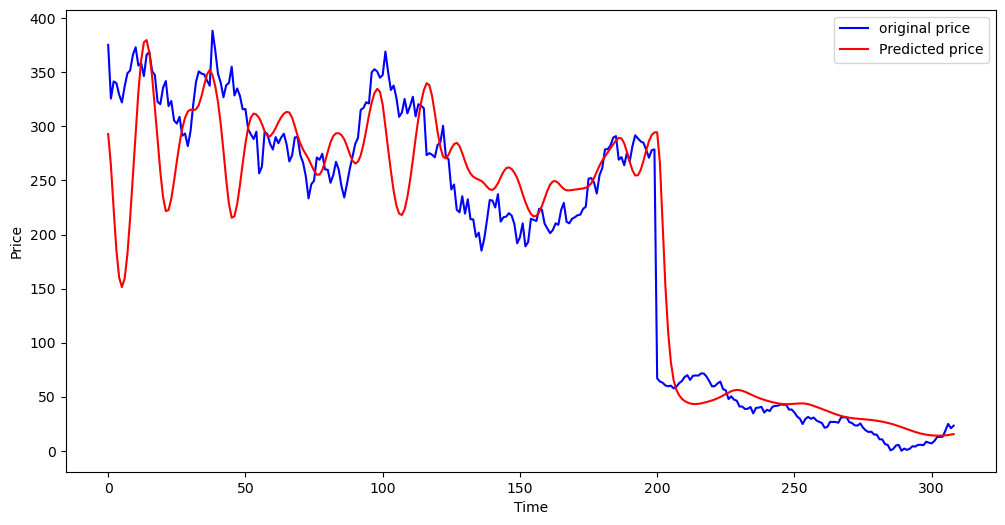

In [48]:
plt.figure(figsize=(12,6))
plt.plot(y_test,'b',label='original price')
plt.plot(y_predicted,'r',label='Predicted price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()